In [2]:
!pip install pandas
!pip install numpy
!pip install tensorflow

                                              0.0/276.6 MB ? eta -:--:--
                                              0.1/276.6 MB 1.1 MB/s eta 0:04:14
                                              0.3/276.6 MB 2.4 MB/s eta 0:01:55
                                              0.4/276.6 MB 2.5 MB/s eta 0:01:51
                                              0.5/276.6 MB 2.3 MB/s eta 0:01:59
                                              0.7/276.6 MB 2.6 MB/s eta 0:01:47
                                              0.9/276.6 MB 2.7 MB/s eta 0:01:41
                                              1.1/276.6 MB 3.2 MB/s eta 0:01:28
                                              1.4/276.6 MB 3.4 MB/s eta 0:01:21
                                              1.6/276.6 MB 3.8 MB/s eta 0:01:14
                                              1.8/276.6 MB 3.8 MB/s eta 0:01:12
                                              2.1/276.6 MB 4.1 MB/s eta 0:01:07
                                              2

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [5]:
tf.__version__

'2.13.0'

In [6]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
dt=df.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)
dt.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [31]:
x = dt.iloc[:,:].values
print (x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [13]:
y = df.iloc[:, -1].values
print(y)

[1 0 1 ... 1 1 0]


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 2] = le.fit_transform(x[:, 2])
print(x)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [38]:
print(x)

[[1.0 0.0 1.0 ... 1 1 101348.88]
 [1.0 0.0 0.0 ... 0 1 112542.58]
 [1.0 0.0 1.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 1.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 1.0 ... 1 0 38190.78]]


In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[ 0.57873591 -0.57873591  0.99720391 ...  0.64609167  0.97024255
   0.02188649]
 [ 0.57873591 -0.57873591 -1.00280393 ... -1.54776799  0.97024255
   0.21653375]
 [ 0.57873591 -0.57873591  0.99720391 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.57873591 -0.57873591  0.99720391 ... -1.54776799  0.97024255
  -1.00864308]
 [-1.72790383  1.72790383 -1.00280393 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 0.57873591 -0.57873591  0.99720391 ...  0.64609167 -1.03067011
  -1.07636976]]


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [43]:
ann = tf.keras.models.Sequential()

In [44]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [45]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [46]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [47]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [49]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 3s 3ms/step - loss: 0.6612 - accuracy: 0.6404
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4696 - accuracy: 0.7961
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4414 - accuracy: 0.8037
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4277 - accuracy: 0.8095
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4189 - accuracy: 0.8148
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4105 - accuracy: 0.8160
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4017 - accuracy: 0.8189
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3896 - accuracy: 0.8294
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3760 - accuracy: 0.8391
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3656 - accura

250/250 [==============================] - 1s 2ms/step - loss: 0.3382 - accuracy: 0.8612
Epoch 82/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8606
Epoch 83/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3378 - accuracy: 0.8627
Epoch 84/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3378 - accuracy: 0.8606
Epoch 85/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3380 - accuracy: 0.8620
Epoch 86/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3376 - accuracy: 0.8619
Epoch 87/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8620
Epoch 88/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3377 - accuracy: 0.8606
Epoch 89/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3376 - accuracy: 0.8608
Epoch 90/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 

In [51]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3367 - accuracy: 0.8618
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3374 - accuracy: 0.8621
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3366 - accuracy: 0.8620
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3367 - accuracy: 0.8630
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3362 - accuracy: 0.8606
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3365 - accuracy: 0.8606
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3361 - accuracy: 0.8621
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3366 - accuracy: 0.8615
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3360 - accuracy: 0.8622
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3359 - accura

250/250 [==============================] - 1s 3ms/step - loss: 0.3332 - accuracy: 0.8639
Epoch 82/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3332 - accuracy: 0.8650
Epoch 83/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3336 - accuracy: 0.8635
Epoch 84/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3333 - accuracy: 0.8618
Epoch 85/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3333 - accuracy: 0.8634
Epoch 86/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3330 - accuracy: 0.8641
Epoch 87/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3333 - accuracy: 0.8641
Epoch 88/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3330 - accuracy: 0.8644
Epoch 89/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3330 - accuracy: 0.8645
Epoch 90/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3334 - accuracy: 

In [54]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1508   87]
 [ 189  216]]


In [77]:
history = ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3292 - accuracy: 0.8639
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3290 - accuracy: 0.8668
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3292 - accuracy: 0.8661
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3290 - accuracy: 0.8665
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3295 - accuracy: 0.8660
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3287 - accuracy: 0.8660
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3290 - accuracy: 0.8664
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3292 - accuracy: 0.8664
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3289 - accuracy: 0.8654
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3292 - accura

250/250 [==============================] - 1s 3ms/step - loss: 0.3283 - accuracy: 0.8650
Epoch 82/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3285 - accuracy: 0.8665
Epoch 83/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3288 - accuracy: 0.8652
Epoch 84/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3286 - accuracy: 0.8648
Epoch 85/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3290 - accuracy: 0.8646
Epoch 86/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3286 - accuracy: 0.8659
Epoch 87/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3286 - accuracy: 0.8655
Epoch 88/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3286 - accuracy: 0.8666
Epoch 89/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3282 - accuracy: 0.8666
Epoch 90/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3286 - accuracy: 

<function matplotlib.pyplot.show(close=None, block=None)>

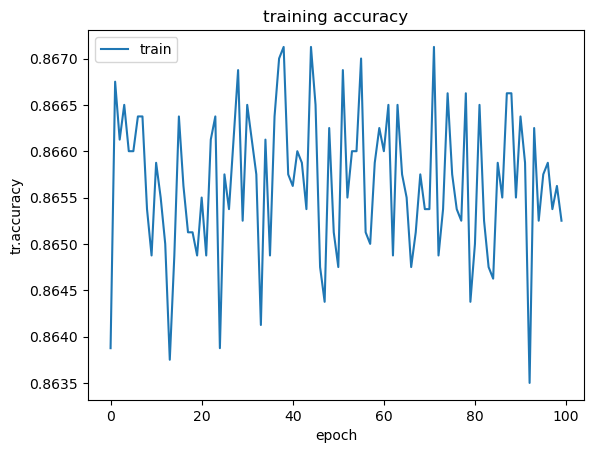

In [83]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('tr.accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

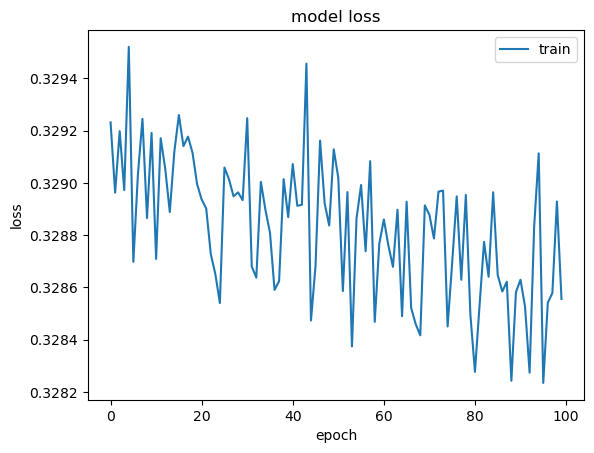

In [79]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper right')
plt.show

In [80]:
history1 = ann.fit(x_test, y_test, batch_size = 32, epochs = 100)

Epoch 1/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3316 - accuracy: 0.8630
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3280 - accuracy: 0.8640
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3259 - accuracy: 0.8660
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3246 - accuracy: 0.8665
Epoch 5/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3232 - accuracy: 0.8665
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3226 - accuracy: 0.8680
Epoch 7/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3228 - accuracy: 0.8705
Epoch 8/100
63/63 [==============================] - 0s 4ms/step - loss: 0.3213 - accuracy: 0.8665
Epoch 9/100
63/63 [==============================] - 0s 4ms/step - loss: 0.3207 - accuracy: 0.8695
Epoch 10/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3206 - accuracy: 0.8695
Epoch 11/

63/63 [==============================] - 0s 3ms/step - loss: 0.3078 - accuracy: 0.8765
Epoch 84/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3081 - accuracy: 0.8755
Epoch 85/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3072 - accuracy: 0.8775
Epoch 86/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3071 - accuracy: 0.8750
Epoch 87/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3072 - accuracy: 0.8750
Epoch 88/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3066 - accuracy: 0.8745
Epoch 89/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3069 - accuracy: 0.8765
Epoch 90/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3072 - accuracy: 0.8785
Epoch 91/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3071 - accuracy: 0.8780
Epoch 92/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3076 - accuracy: 0.8740
Epoch 93/100


<function matplotlib.pyplot.show(close=None, block=None)>

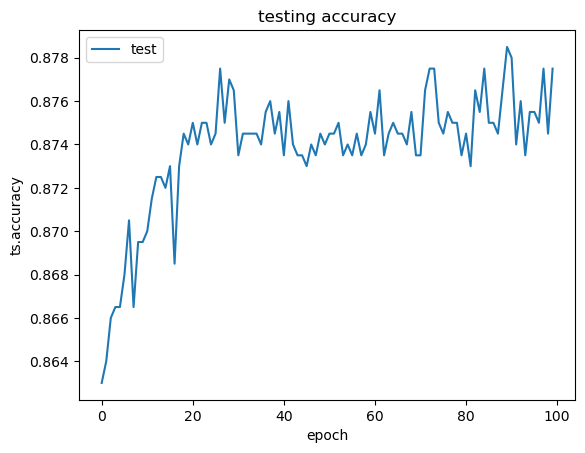

In [82]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.title('testing accuracy')
plt.ylabel('ts.accuracy')
plt.xlabel('epoch')
plt.legend(['test'],loc='upper left')
plt.show